Here are the first five rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines 

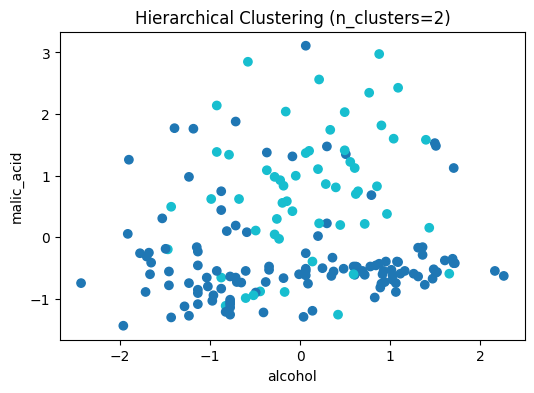


Running hierarchical clustering with n_clusters=3...


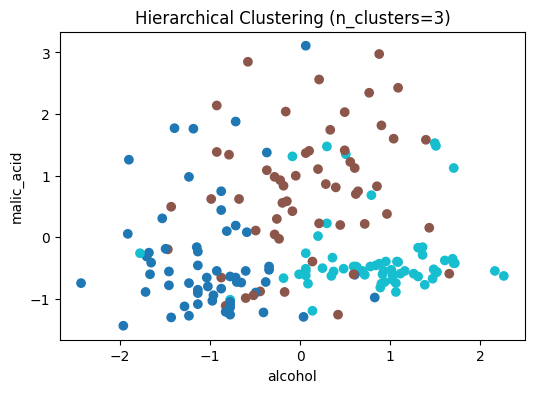


Running hierarchical clustering with n_clusters=4...


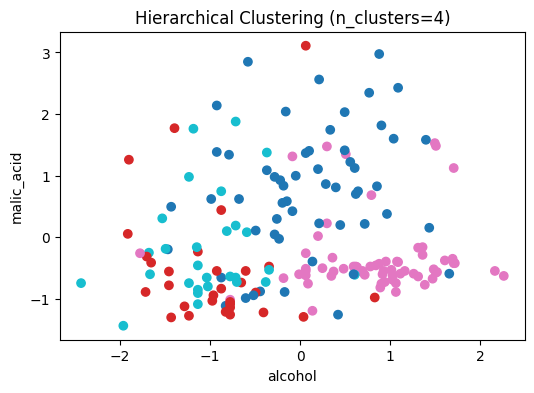


Generating dendrogram...


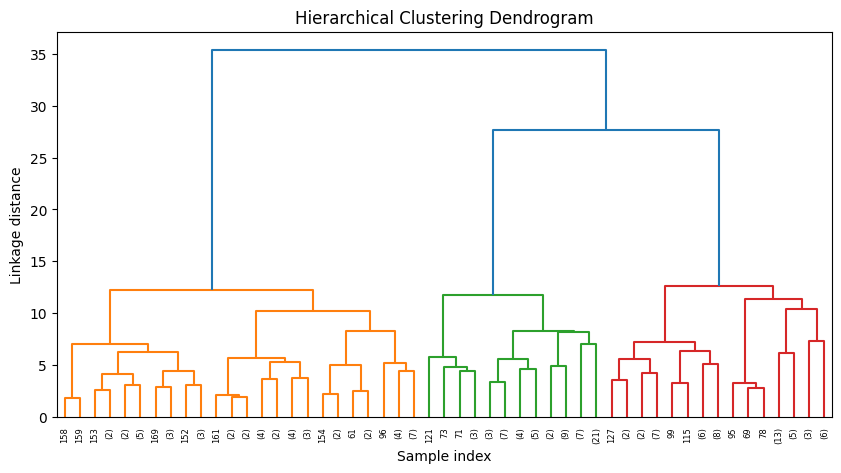


Running DBSCAN with eps=0.5, min_samples=5...


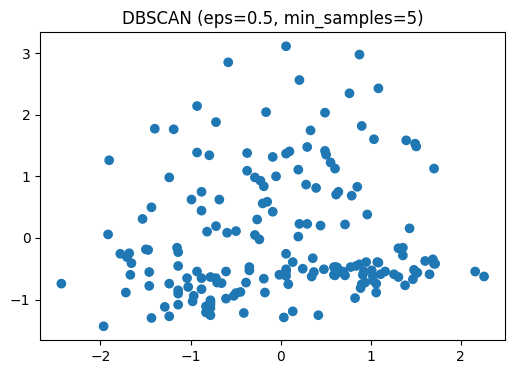

Silhouette Score: Not enough clusters to compute
Homogeneity Score: 0.000
Completeness Score: 1.000

Running DBSCAN with eps=1.0, min_samples=5...


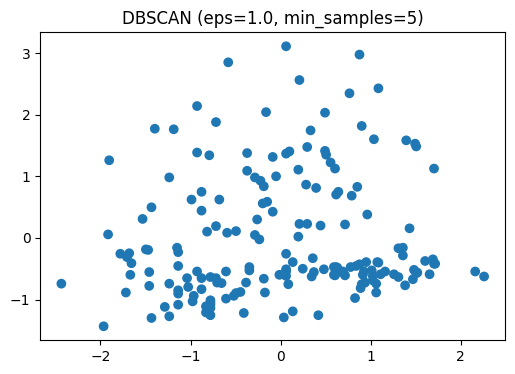

Silhouette Score: Not enough clusters to compute
Homogeneity Score: 0.000
Completeness Score: 1.000

Running DBSCAN with eps=0.3, min_samples=3...


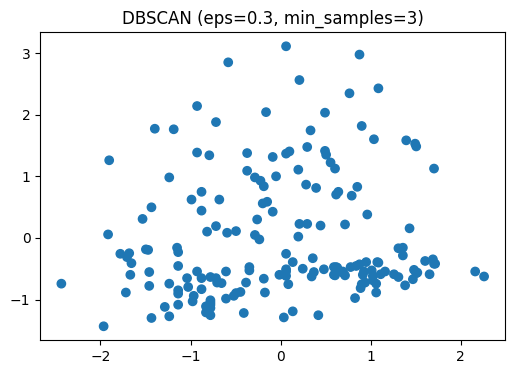

Silhouette Score: Not enough clusters to compute
Homogeneity Score: 0.000
Completeness Score: 1.000


In [1]:
# I'm importing the libraries I need for data handling and scaling
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# I'm loading the Wine dataset
wine_data = load_wine()
# Converting the data to a pandas DataFrame for easy exploration
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
# Adding the target column so I can compare clusters against the true labels later
df['target'] = wine_data.target

# Let's take a quick look at the data
print("Here are the first five rows:")
print(df.head())
print("\nDataFrame info:")
df.info()
print("\nBasic statistics:")
print(df.describe())

# I'm standardizing the features, because clustering algorithms work better when features share a scale
features = df.drop('target', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
print("\nFeatures have been standardized.")


# %% [markdown]
# Step 3: DBSCAN Clustering
# Now I'll switch to DBSCAN, varying eps and min_samples to see how noise and clusters form.
# I'll also compute some cluster quality metrics.

# %%
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Creating a function to run DBSCAN and report results
def dbscan_experiment(eps, min_samples):
    print(f"\nRunning DBSCAN with eps={eps}, min_samples={min_samples}...")
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)

    # Plotting the clustering result, including noise as label -1
    plt.figure(figsize=(6,4))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='tab10')
    plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
    plt.show()

    # For silhouette score, I'm excluding noise points since they don't form clusters
    mask = labels != -1
    if len(set(labels[mask])) > 1:
        sil = silhouette_score(X_scaled[mask], labels[mask])
        print(f"Silhouette Score (excluding noise): {sil:.3f}")
    else:
        print("Silhouette Score: Not enough clusters to compute")

    # I'm also comparing clusters to true labels using homogeneity and completeness
    homo = homogeneity_score(df['target'], labels)
    comp = completeness_score(df['target'], labels)
    print(f"Homogeneity Score: {homo:.3f}")
    print(f"Completeness Score: {comp:.3f}")

# Trying several parameter combinations
for eps, ms in [(0.5, 5), (1.0, 5), (0.3, 3)]:
    dbscan_experiment(eps, ms)
